<a href="https://colab.research.google.com/github/devloper-gazi/music-recommendation/blob/main/App-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract

In [ ]:
import numpy as np

# Olasılık uzayı
olasilik_uzayi = np.array([1, 2, 3, 4, 5, 6])

# Olay A: Zarın atılması sonucu 6 gelmesi
A = np.array([6])

# P(A) hesapla
olasilik_A = len(A) / len(olasilik_uzayi)
print(f"P(A) = {olasilik_A}")


P(A) = 0.16666666666666666


In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

# MNIST veri setini yükle
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verileri düzleştirme ve normalize etme
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Etiketleri kategorik hale getirme
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Modeli oluştur
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Modeli derleme
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Test seti üzerinde değerlendirme
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test doğruluğu:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2711 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1097 - accuracy: 0.9677
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0729 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0506 - accuracy: 0.9853
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9785
Test doğruluğu: 0.9785000085830688


Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2653 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1065 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0703 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0503 - accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9804
Test accuracy: 0.980400025844574
1/1 [==============================] - 0s 34ms/step


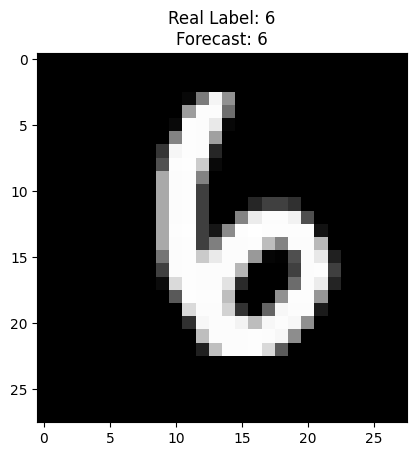

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

# MNIST veri setini yükle
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verileri düzleştirme ve normalize etme
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# Etiketleri kategorik formata dönüştürme
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Modeli oluşturma
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# Modeli derleme
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Test seti üzerinde değerlendirme
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Rastgele bir test örneği seçme
index = np.random.randint(0, len(test_images))
sample_image = test_images[index].reshape((1, 28 * 28))
sample_label = test_labels[index]

# Modelden tahmin alme
predictions = network.predict(sample_image)
predicted_label = np.argmax(predictions)

# Resmi ve tahmini gösterme
plt.imshow(test_images[index].reshape((28, 28)), cmap='gray')
plt.title(f"Real Label: {np.argmax(sample_label)}\nForecast: {predicted_label}")
plt.show()
